In [1]:
#Ремизов Никита Вячеславович
#Классификаторы - Байес, Логистическая регрессия; 
#Классы - Heat Dissipation Failure, Tool Wear Failure

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import preprocessing

df = pd.read_excel('predictive_maintenance.xlsx')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [4]:
#оцениваем датасет
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [5]:
#смотрим какие классы есть
dataframe_classes = df['Failure Type'].value_counts()
dataframe_classes

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [6]:
#удаляем лишние классы, классифицировать будем только по заданию
#Классы - Heat Dissipation Failure, Tool Wear Failure
temp_ds = df[df['Failure Type'] != 'No Failure']
temp_ds = temp_ds[temp_ds['Failure Type'] != 'Power Failure']
temp_ds = temp_ds[temp_ds['Failure Type'] != 'Overstrain Failure']
temp_ds = temp_ds[temp_ds['Failure Type'] != 'Random Failures']
temp_ds['Failure Type'].value_counts() #смотрим что получилось

Heat Dissipation Failure    112
Tool Wear Failure            45
Name: Failure Type, dtype: int64

In [7]:
df = temp_ds
#перекодируем классы
dict={'Heat Dissipation Failure':0, 'Tool Wear Failure':1}
df['TargetF']=df.replace({'Failure Type': dict})['Failure Type']
df['TargetF'].value_counts()

0    112
1     45
Name: TargetF, dtype: int64

In [8]:
#смотрим что получилось, признаки на этот раз используем все
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,TargetF
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,Tool Wear Failure,1
1087,1088,H30501,H,296.9,307.8,1549,35.8,206,1,Tool Wear Failure,1
1509,1510,L48689,L,298.0,308.5,1429,37.7,220,1,Tool Wear Failure,1
1682,1683,H31096,H,297.9,307.4,1604,36.1,225,1,Tool Wear Failure,1
1763,1764,L48943,L,298.2,307.6,1511,31.0,209,1,Tool Wear Failure,1
...,...,...,...,...,...,...,...,...,...,...,...
8846,8847,M23706,M,297.4,308.8,1325,62.4,204,1,Tool Wear Failure,1
9018,9019,L56198,L,297.3,308.1,1615,35.4,217,1,Tool Wear Failure,1
9174,9175,L56354,L,297.8,308.9,1871,25.6,200,1,Tool Wear Failure,1
9576,9577,L56756,L,299.6,310.7,1922,23.3,205,1,Tool Wear Failure,1


In [9]:
#удаляем лишние столбцы таблицы
pm_df=df
X=pm_df[['Air temperature [K]','Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]','Tool wear [min]']]
y = pm_df['TargetF']

target_names = ['No Failure', 'Heat Dissipation Failure','Overstrain Failure',
                'Power Failure', 'Random Failures', 'Tool Wear Failure']

#масштабируем признаки
scaler = preprocessing.MinMaxScaler()
scaled_features = scaler.fit_transform(X)

X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
X

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
77,0.253333,0.238095,0.229462,0.486434,0.820717
1087,0.000000,0.063492,0.318225,0.379845,0.812749
1509,0.146667,0.174603,0.204910,0.416667,0.868526
1682,0.133333,0.000000,0.370161,0.385659,0.888446
1763,0.173333,0.031746,0.282342,0.286822,0.824701
...,...,...,...,...,...
8846,0.066667,0.222222,0.106704,0.895349,0.804781
9018,0.053333,0.111111,0.380548,0.372093,0.856574
9174,0.120000,0.238095,0.622285,0.182171,0.788845
9576,0.360000,0.523810,0.670444,0.137597,0.808765


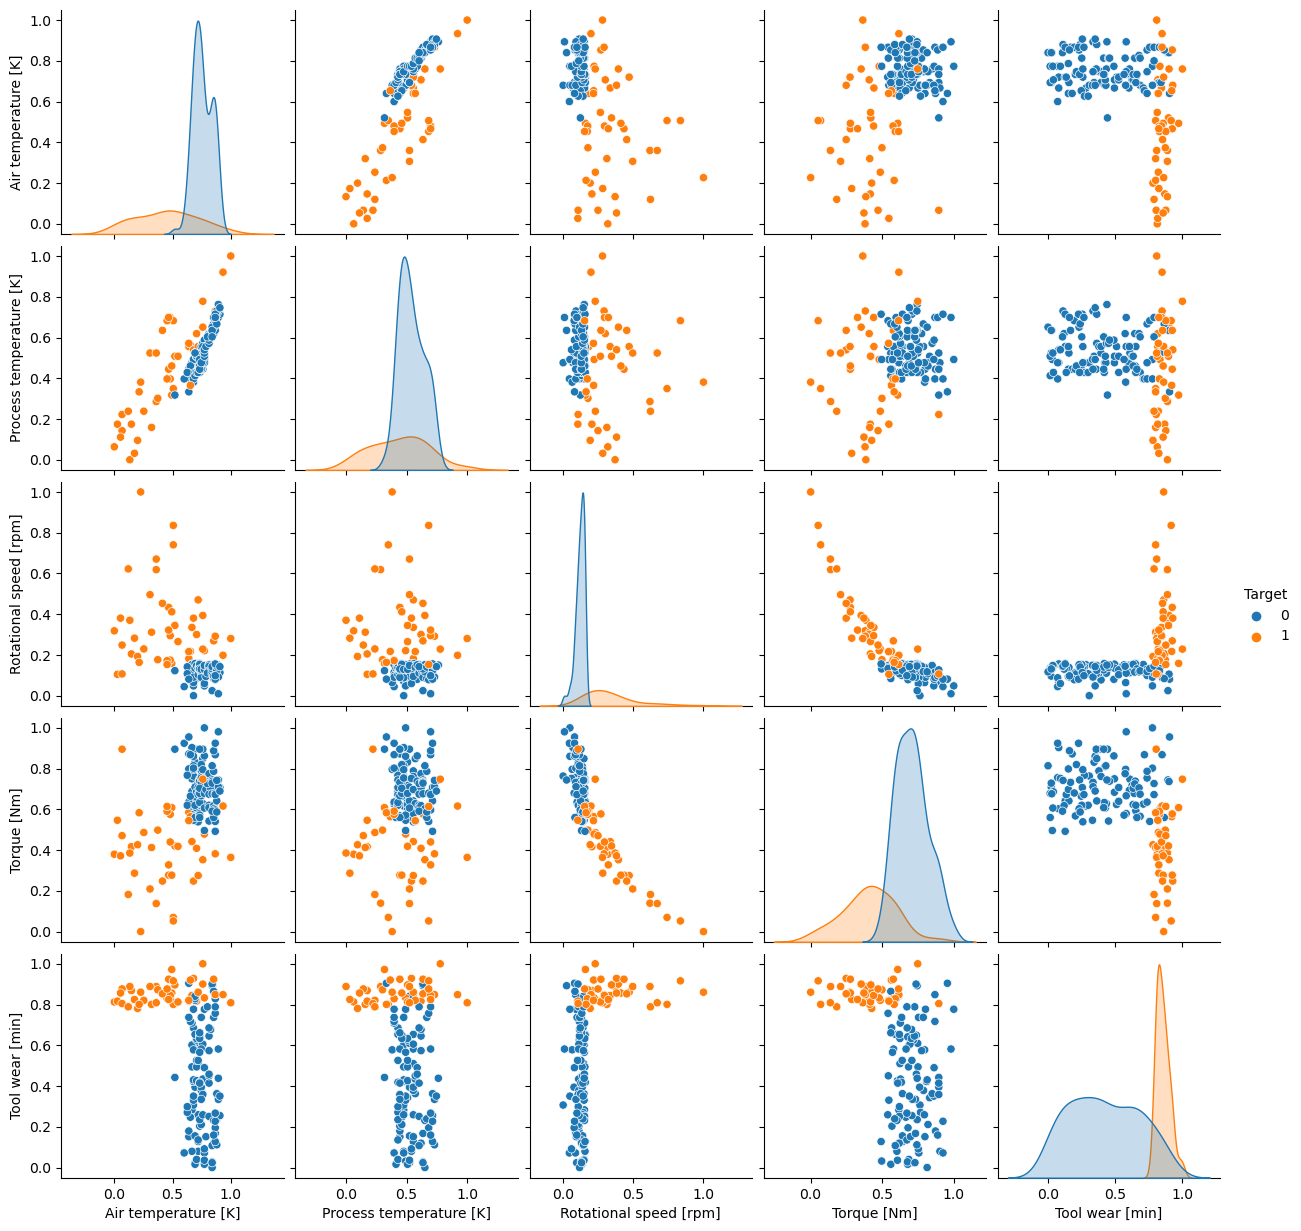

In [10]:
#оцениваем выборку визуально
new_df=pd.DataFrame(X, index=pm_df.index).copy()
new_df['Target'] = y
sns.pairplot(new_df,hue='Target')
plt.show()
#распределения перекрываются, но в целом данные можно разделить прямой, хоть и не идеально

In [11]:
#строим классификаторы
#по заданию Классификаторы - Байес, Логистическая регрессия;
names = [ "Logistic Regression", "Naive Bayes"]

classifiers = [
    LogisticRegression(C=100, max_iter=500 ),
    GaussianNB(),
    ]

In [12]:
X #смотрим таблицу признаков

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
77,0.253333,0.238095,0.229462,0.486434,0.820717
1087,0.000000,0.063492,0.318225,0.379845,0.812749
1509,0.146667,0.174603,0.204910,0.416667,0.868526
1682,0.133333,0.000000,0.370161,0.385659,0.888446
1763,0.173333,0.031746,0.282342,0.286822,0.824701
...,...,...,...,...,...
8846,0.066667,0.222222,0.106704,0.895349,0.804781
9018,0.053333,0.111111,0.380548,0.372093,0.856574
9174,0.120000,0.238095,0.622285,0.182171,0.788845
9576,0.360000,0.523810,0.670444,0.137597,0.808765


In [13]:
y #смотрим таблицу классов

77      1
1087    1
1509    1
1682    1
1763    1
       ..
8846    1
9018    1
9174    1
9576    1
9758    1
Name: TargetF, Length: 157, dtype: int64

In [14]:
#разбиваем данные 70/30 по заданию
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123, stratify=y)
print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")

Количество строк в y_train по классам: [78 31]
Количество строк в y_test по классам: [34 14]


In [15]:
target_names = ['Heat Dissipation Failure', 'Tool Wear Failure'] #имена классов

In [16]:
#обучаем классификаторы
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import time

import pandas as pd
res_df=pd.DataFrame(columns=['Classificator', 'Score','Time'])

# iterate over classifiers

for name, clf in zip(names, classifiers):
    t0 = time.time()
    clf.fit(X_train.values, y_train)
    score = clf.score(X_test.values, y_test)
    
    clf_pred = clf.predict(X_test.values)
    clf_acc = accuracy_score(y_test, clf_pred)
    t1 = time.time()
    dt=(t1 - t0)*1000
    print(name, ': %.3f ms' % (dt))
    print(classification_report(y_test, clf_pred, target_names = target_names, zero_division=0))
    res_df.loc[len(res_df.index)] = [name, score, dt] 

Logistic Regression : 5.003 ms
                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00        34
       Tool Wear Failure       1.00      1.00      1.00        14

                accuracy                           1.00        48
               macro avg       1.00      1.00      1.00        48
            weighted avg       1.00      1.00      1.00        48

Naive Bayes : 1.999 ms
                          precision    recall  f1-score   support

Heat Dissipation Failure       0.97      0.97      0.97        34
       Tool Wear Failure       0.93      0.93      0.93        14

                accuracy                           0.96        48
               macro avg       0.95      0.95      0.95        48
            weighted avg       0.96      0.96      0.96        48



In [17]:
res_df

,Classificator,Score,Time
0,Logistic Regression,1.000000,5.002737
1,Naive Bayes,0.958333,1.999378


In [18]:
#смотрим метод главных компонент (п.4)
from sklearn import decomposition
pca = decomposition.PCA(n_components=5)
pca.fit(X, y)
X_pca = pca.transform(X)

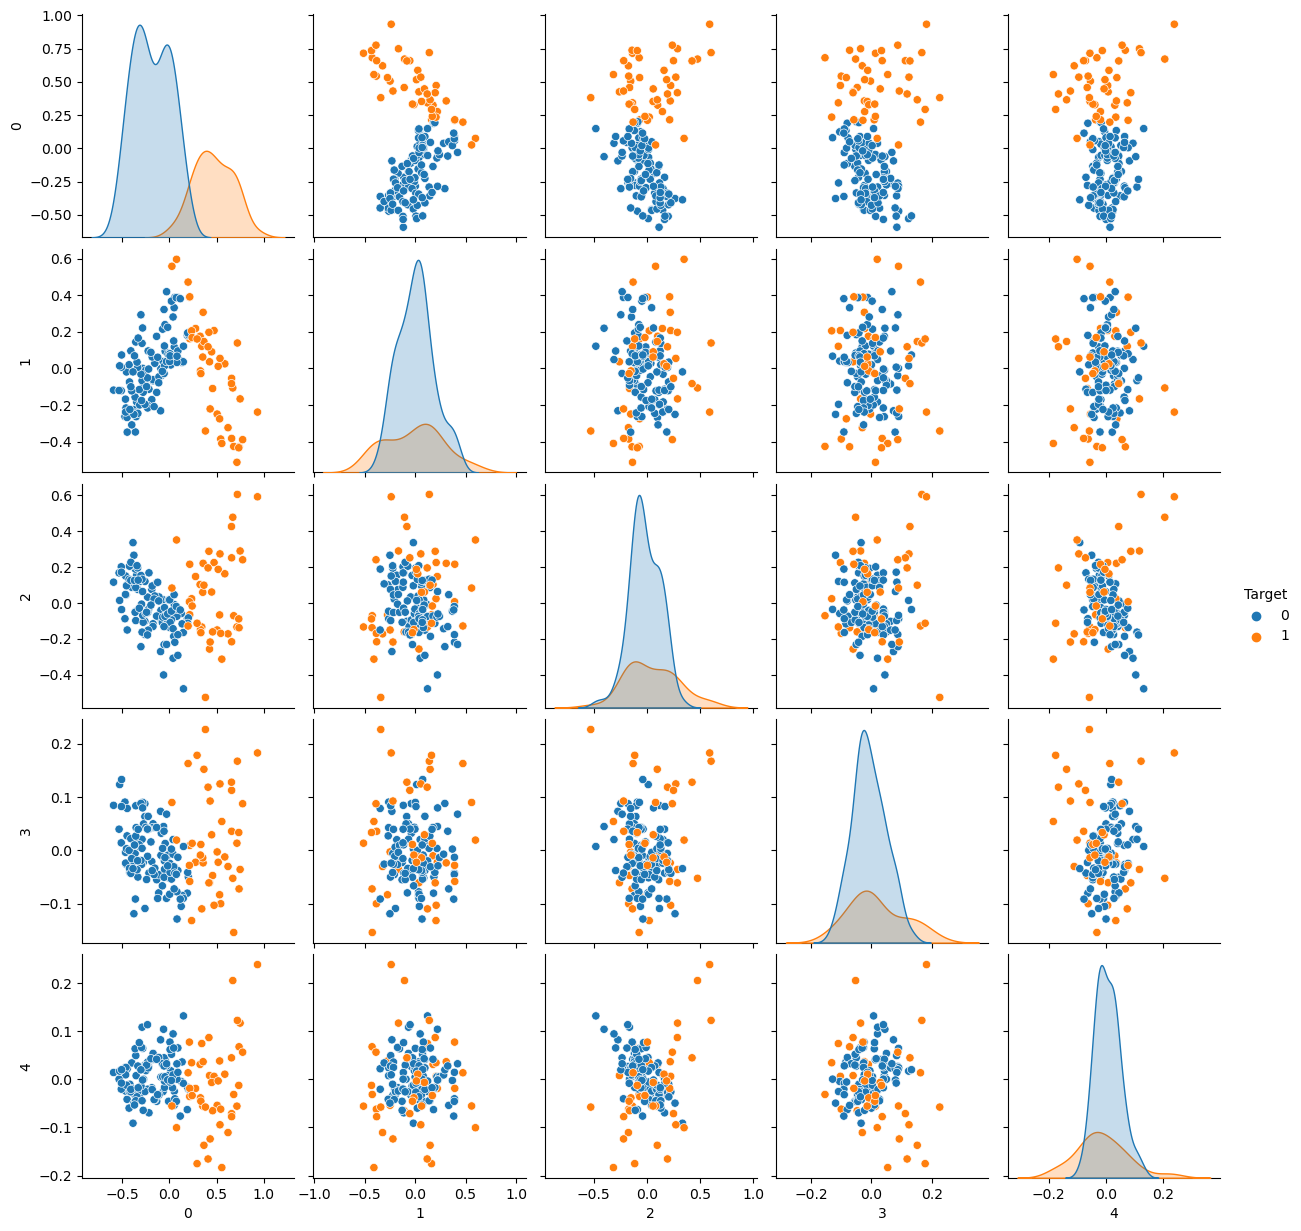

In [19]:
pca_df=pd.DataFrame(X_pca, index=pm_df.index)
pca_df['Target'] = y
sns.pairplot(pca_df,hue='Target')
plt.show()

In [20]:
print(pca.singular_values_)
print(pca.explained_variance_)

[4.46400313 2.66055241 2.24543659 0.85227167 0.75867086]
[0.12773926 0.04537525 0.03232042 0.0046562  0.00368962]


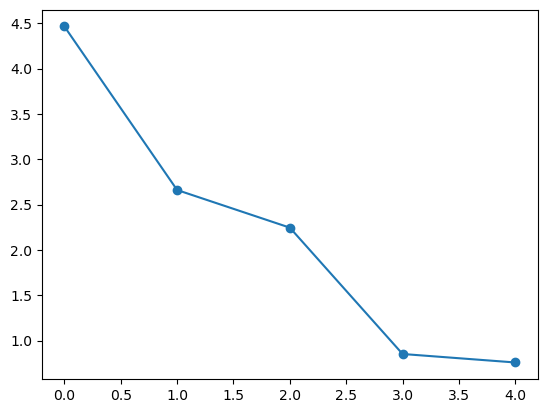

In [21]:
#судя по графикам, можно попробовать оставить 1 компоненту, 
#в остальных 4 компонентах явное перекрытие распределений и нет адекватной разделимости
plt.plot(pca.singular_values_, marker='o') 
plt.show()

In [22]:
#пробуем с одной компонентой
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
pca.fit(X, y)
X_pca = pca.transform(X)

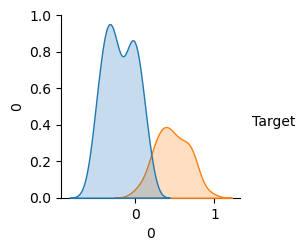

In [23]:
pca_df=pd.DataFrame(X_pca, index=pm_df.index)
pca_df['Target'] = y
sns.pairplot(pca_df,hue='Target')
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123, stratify=y)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
res_df=pd.DataFrame(columns=['Classificator', 'Score','Time'])
for name, clf in zip(names, classifiers):
    t0 = time.time()
    clf.fit(X_train_pca, y_train)
    score = clf.score(X_test_pca, y_test)
    
    clf_pred = clf.predict(X_test_pca)
    clf_acc = accuracy_score(y_test, clf_pred)
    t1 = time.time()
    dt=(t1 - t0)*1000
    print(name, ': %.3f ms' % (dt))
    print(classification_report(y_test, clf_pred, target_names = target_names, zero_division=0))
    res_df.loc[len(res_df.index)] = [name, score, dt] 

Logistic Regression : 3.000 ms
                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00        34
       Tool Wear Failure       1.00      1.00      1.00        14

                accuracy                           1.00        48
               macro avg       1.00      1.00      1.00        48
            weighted avg       1.00      1.00      1.00        48

Naive Bayes : 1.000 ms
                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00        34
       Tool Wear Failure       1.00      1.00      1.00        14

                accuracy                           1.00        48
               macro avg       1.00      1.00      1.00        48
            weighted avg       1.00      1.00      1.00        48



In [25]:
res_df #Байес стал работать точнее

,Classificator,Score,Time
0,Logistic Regression,1.0,3.000498
1,Naive Bayes,1.0,1.000166


In [26]:
#пробуем факторный анализ
from sklearn.decomposition import FactorAnalysis
# Простая линейная генеративная модель с гауссовскими скрытыми переменными.
fa = FactorAnalysis(n_components=5, max_iter=10000, svd_method='lapack', rotation='quartimax')
fa.fit(X, y)
X_fa=fa.transform(X)

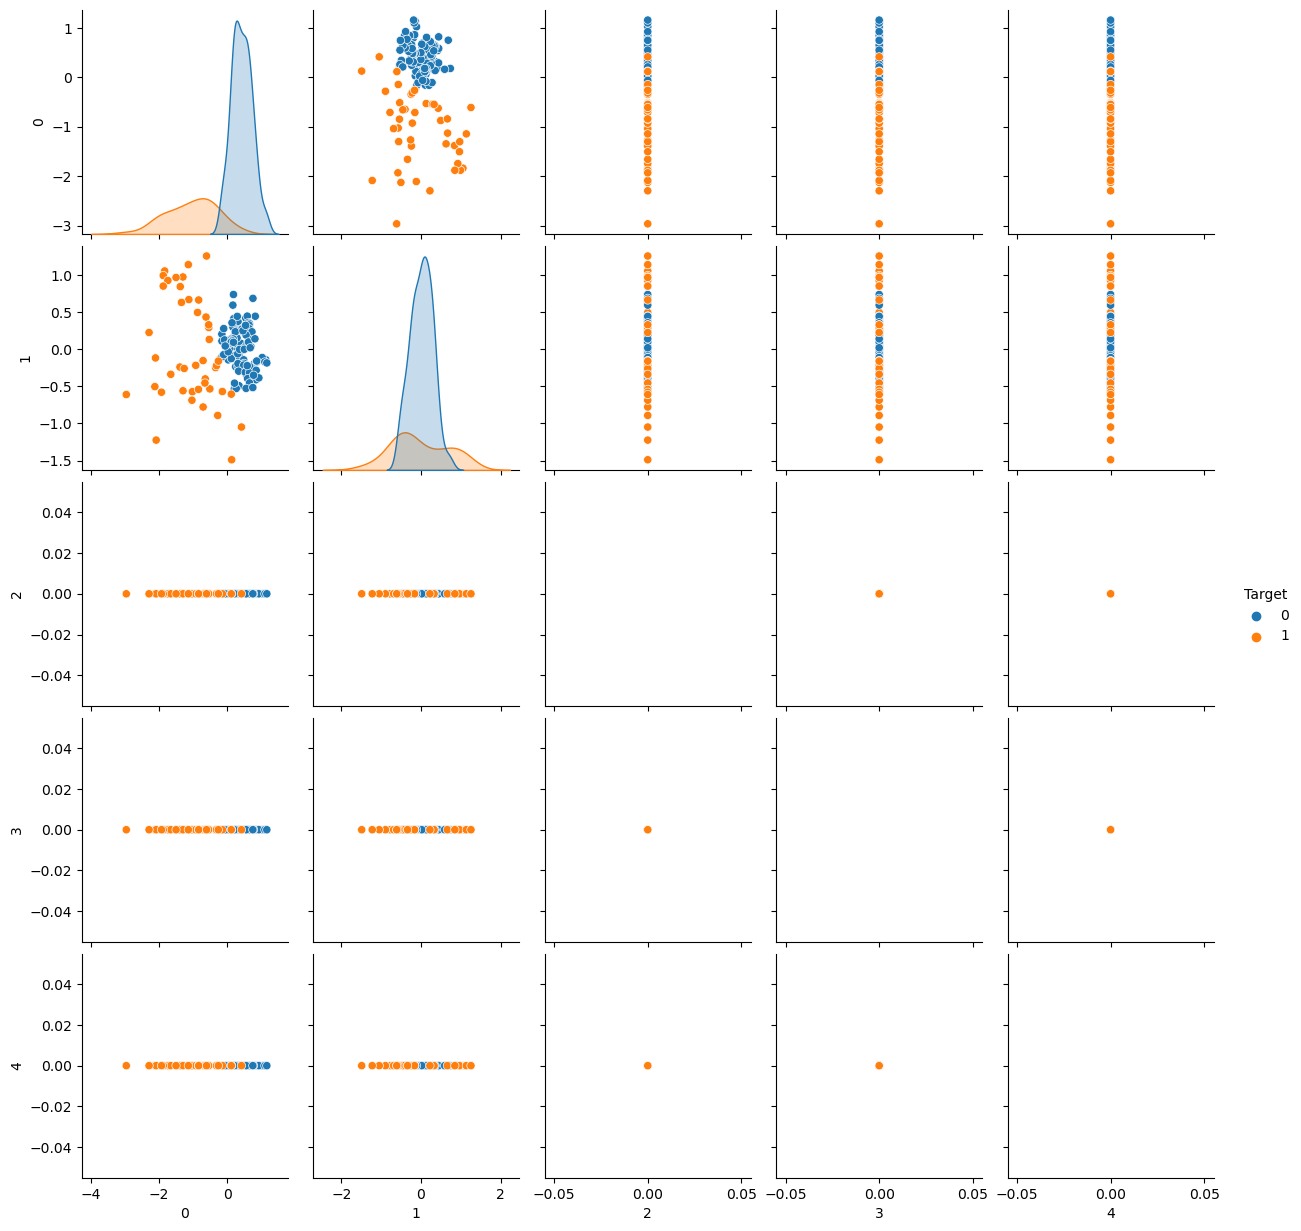

In [27]:
fa_df=pd.DataFrame(X_fa, index=pm_df.index)
fa_df['Target'] = y
sns.pairplot(fa_df,hue='Target')
plt.show()

In [28]:
print('Uniqueness:', fa.noise_variance_)

Uniqueness: [0.04274778 0.02538841 0.02120155 0.03711021 0.08597114]


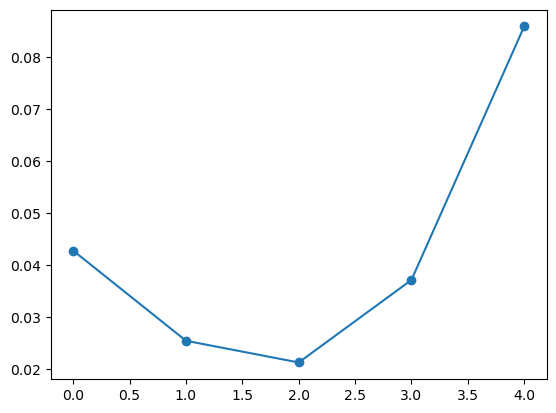

In [29]:
plt.plot(fa.noise_variance_, marker='o') 
plt.show()

In [30]:
fa = FactorAnalysis(n_components=5)
fa.fit(X, y)

FactorAnalysis(n_components=5)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123, stratify=y)
X_train_fa = fa.transform(X_train)
X_test_fa = fa.transform(X_test)
res_df=pd.DataFrame(columns=['Classificator', 'Score','Time'])

for name, clf in zip(names, classifiers):
    t0 = time.time()
    clf.fit(X_train_fa, y_train)
    score = clf.score(X_test_fa, y_test)
    
    clf_pred = clf.predict(X_test_fa)
    clf_acc = accuracy_score(y_test, clf_pred)
    t1 = time.time()
    dt=(t1 - t0)*1000
    print(name, ': %.3f ms' % (dt))
    print(classification_report(y_test, clf_pred, target_names = target_names, zero_division=0))
    res_df.loc[len(res_df.index)] = [name, score, dt] 

Logistic Regression : 2.000 ms
                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00        34
       Tool Wear Failure       1.00      1.00      1.00        14

                accuracy                           1.00        48
               macro avg       1.00      1.00      1.00        48
            weighted avg       1.00      1.00      1.00        48

Naive Bayes : 1.000 ms
                          precision    recall  f1-score   support

Heat Dissipation Failure       0.97      1.00      0.99        34
       Tool Wear Failure       1.00      0.93      0.96        14

                accuracy                           0.98        48
               macro avg       0.99      0.96      0.97        48
            weighted avg       0.98      0.98      0.98        48



In [32]:
res_df #Байес стал работать точнее, чем при исходной размерности, но хуже, чем при анализе главных компонент

,Classificator,Score,Time
0,Logistic Regression,1.000000,2.000093
1,Naive Bayes,0.979167,1.000166


Вывод: в целом, применение методов снижения размерности в данном случае позволило повысить точность классификации. Для логистической регрессии точность классификации изначально была 100%, для Байесовского классификатора точность возрасла с 95.8%, притом 100% точности удалось достигнуть при помощи анализа главных компонент. Кроме того, возросло быстродействие модели логистической регрессии с 5 мс до 2-3 мс.
Стоит обратить внимание на задание. По заданию требовалось ограничиться классами  "ошибка теплоотвода" и "ошибка износа инструмента". При этом среди признаков имеем время износа инструмента в минутах и температуры воздуха/процесса, что красноречиво намекает на то, что для данных классов снижение размерности действительно может быть полезно.